# Projet guidé : Prédiction prix de vente de voitures

## 1. Introduction au dataset

<img src="images01.png"  >

Pistes à suivre:
- Lire le fichier imports-85.data dans un DataFrame qu'on nommera cars. Si vous lisez le fichier à l'aide de pandas.read_csv() sans spécifier de valeur de paramètre supplémentaire, vous remarquerez que les noms de colonne ne correspondent pas à ceux de la documentation du dataset. Comment résoudre ce problème? 
- Quelles sont les colonnes numériques? Déterminer les caractéristiques et la colonne cible.
- Afficher les premières lignes du DataFrame.
- Sélectionner ensuite seulement les colonnes de valeurs continues (à partir de la documentation). Vous nommerez ce nouveau DataFrame numeric_cars. 
- Afficher les 5 premières valeurs de numeric_cars et s'assurer que cela ressemble à l'aperçu ci-dessus.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
cars = pd.read_csv('datas/imports-85.data')
cars.head(2)

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500


In [4]:
cars.columns = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 
        'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

cars.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [5]:
cars.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-rate     float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [6]:
cars._get_numeric_data().head()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-rate,city-mpg,highway-mpg
0,3,88.6,168.8,64.1,48.8,2548,130,9.0,21,27
1,1,94.5,171.2,65.5,52.4,2823,152,9.0,19,26
2,2,99.8,176.6,66.2,54.3,2337,109,10.0,24,30
3,2,99.4,176.6,66.4,54.3,2824,136,8.0,18,22
4,2,99.8,177.3,66.3,53.1,2507,136,8.5,19,25


In [7]:
# a partir de fichier imports-85.names
# mais dans le fichier imports-85.data --- compression-rate est (float) et il n'est pas continues et pareil pour engine size il est (int).....
# alors tant qu'il est demandé d'avoir le datat frame au dessus alors je vais les mettre
valeurs_continues = ['normalized-losses','wheel-base','length','width', 'height','curb-weight','bore','stroke','compression-rate','horsepower','peak-rpm','city-mpg', 'highway-mpg', 'price']

numeric_cars = cars[valeurs_continues]
numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
1,?,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
2,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950
3,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450
4,?,99.8,177.3,66.3,53.1,2507,3.19,3.40,8.5,110,5500,19,25,15250


## 2. Nettoyage des données

Pistes à suivre:
- Utiliser la méthode DataFrame.replace() pour remplacer toutes les valeurs '?' avec la valeur manquante numpy.nan.
- Parce que '?' est une valeur de type string, les colonnes contenant cette valeur ont été converties dans le type de données object de pandas (au lieu d'un type numérique comme int ou float). Après avoir remplacé les valeurs '?', déterminez quelles colonnes doivent être converties en type numérique. Vous pouvez utiliser les méthodes DataFrame.astype() ou Series.astype() pour convertir les colonnes en d'autres types de données.
- Retourner le nombre de lignes pour lesquelles une valeur est manquante dans la colonne 'normalized-losses'. Déterminez comment vous devez gérer cette colonne. Vous pourriez:
 + Remplacer les valeurs manquantes en utilisant les valeurs moyennes de cette colonne.
 + Supprimer entièrement les lignes (en particulier si des valeurs sont manquantes dans les autres colonnes de ces lignes).
 + Supprimer la colonne entièrement.
- Explorer le nombre de valeurs manquantes pour les autres colonnes et gérer les valeurs manquantes.
- Parmi les colonnes que vous avez décidé de conserver, normaliser les unités numériques de manière à ce que toutes les valeurs soient comprises entre 0 et 1.
- Afficher les 5 premières lignes pour vérifier.

In [8]:
numeric_cars = numeric_cars.replace('?',np.nan)
numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
1,NaN,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
2,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950
3,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450
4,NaN,99.8,177.3,66.3,53.1,2507,3.19,3.40,8.5,110,5500,19,25,15250


In [9]:
numeric_cars.dtypes

normalized-losses     object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
bore                  object
stroke                object
compression-rate     float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [10]:
#il faut convertir [normalized-losses,bore,stroke,horsepower,peak-rpm,price] en type float
numeric_cars = numeric_cars.astype('float')

In [11]:
numeric_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   normalized-losses  164 non-null    float64
 1   wheel-base         204 non-null    float64
 2   length             204 non-null    float64
 3   width              204 non-null    float64
 4   height             204 non-null    float64
 5   curb-weight        204 non-null    float64
 6   bore               200 non-null    float64
 7   stroke             200 non-null    float64
 8   compression-rate   204 non-null    float64
 9   horsepower         202 non-null    float64
 10  peak-rpm           202 non-null    float64
 11  city-mpg           204 non-null    float64
 12  highway-mpg        204 non-null    float64
 13  price              200 non-null    float64
dtypes: float64(14)
memory usage: 22.4 KB


In [12]:
numeric_cars.isnull().sum()

normalized-losses    40
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [13]:
numeric_cars['normalized-losses'].isnull().value_counts()

False    164
True      40
Name: normalized-losses, dtype: int64

In [14]:
numeric_cars.isnull().sum()

normalized-losses    40
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [15]:
numeric_cars.mean()

normalized-losses      122.000000
wheel-base              98.806373
length                 174.075000
width                   65.916667
height                  53.749020
curb-weight           2555.602941
bore                     3.329050
stroke                   3.258300
compression-rate        10.148137
horsepower             104.222772
peak-rpm              5125.990099
city-mpg                25.240196
highway-mpg             30.769608
price                13205.690000
dtype: float64

In [16]:
numeric_cars = numeric_cars.fillna(numeric_cars.mean())

In [17]:
numeric_cars.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [18]:
numeric_cars

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,122.0,88.6,168.8,64.1,48.8,2548.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
1,122.0,94.5,171.2,65.5,52.4,2823.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
2,164.0,99.8,176.6,66.2,54.3,2337.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
3,164.0,99.4,176.6,66.4,54.3,2824.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0
4,122.0,99.8,177.3,66.3,53.1,2507.0,3.19,3.40,8.5,110.0,5500.0,19.0,25.0,15250.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,95.0,109.1,188.8,68.9,55.5,2952.0,3.78,3.15,9.5,114.0,5400.0,23.0,28.0,16845.0
200,95.0,109.1,188.8,68.8,55.5,3049.0,3.78,3.15,8.7,160.0,5300.0,19.0,25.0,19045.0
201,95.0,109.1,188.8,68.9,55.5,3012.0,3.58,2.87,8.8,134.0,5500.0,18.0,23.0,21485.0
202,95.0,109.1,188.8,68.9,55.5,3217.0,3.01,3.40,23.0,106.0,4800.0,26.0,27.0,22470.0


In [19]:
#Parmi les colonnes que vous avez décidé de conserver, normaliser les unités numériques de 
#manière à ce que toutes les valeurs soient comprises entre 0 et 1.
normalized_cars = (numeric_cars - numeric_cars.min())/(numeric_cars.max() - numeric_cars.min())

In [20]:
normalized_cars['price'] = numeric_cars['price']
print(normalized_cars.shape)
normalized_cars.head()

(204, 14)


,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.298429,0.058309,0.413433,0.316667,0.083333,0.411171,0.664286,0.290476,0.12500,0.262500,0.346939,0.222222,0.289474,16500.0
1,0.298429,0.230321,0.449254,0.433333,0.383333,0.517843,0.100000,0.666667,0.12500,0.441667,0.346939,0.166667,0.263158,16500.0
2,0.518325,0.384840,0.529851,0.491667,0.541667,0.329325,0.464286,0.633333,0.18750,0.225000,0.551020,0.305556,0.368421,13950.0
3,0.518325,0.373178,0.529851,0.508333,0.541667,0.518231,0.464286,0.633333,0.06250,0.279167,0.551020,0.138889,0.157895,17450.0
4,0.298429,0.384840,0.540299,0.500000,0.441667,0.395268,0.464286,0.633333,0.09375,0.258333,0.551020,0.166667,0.236842,15250.0


## 3. Modèle univarié

Pistes à suivre:
- Créer une fonction nommée, knn_train_test() qui encapsule le processus d'entrainement et de validation simple. Cette fonction doit avoir 3 paramètres: nom de la colonne d'apprentissage, nom de la colonne cible et objet dataframe.
 + Cette fonction doit scinder le dataset en un set de training et de test.
 + Ensuite, il convient d'instancier la classe KNeighborsRegressor, d'ajuster le modèle au set de training et de faire des prédictions sur le set de test.
 + Enfin, il convient de calculer la racine carrée d'erreur de moyenne quadratique RMSE et de retourner cette valeur.
- Utiliser cette fonction pour entrainer et tester des modèles univariés en utilisant les différentes colonnes numériques du dataset. Quelle colonne a obtenu les meilleurs résultats avec la valeur k par défaut?
- Modifier la fonction knn_train_test() que vous avez écrite pour accepter un paramètre pour la valeur k.
 + Mettre à jour la logique de la fonction pour utiliser ce paramètre.
 + Pour chaque colonne numérique, créer, entrainer et tester un modèle univarié en utilisant les valeurs k suivantes (1, 3, 5, 7, et 9). 
 + Visualiser les résultats à l'aide d'un graphique à nuage de points ou d'un tracé linéaire.
 + Trier les caractéristiques par moyenne de valeurs RMSE.

In [28]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [30]:
def knn_train_test(df,train_col,target_col):
    knn = KNeighborsRegressor()
    np.random.seed(1)
    
    random_index = np.random.permutation(df.index)
    random_df = df.reindex(random_index)
    
    train_set_end = int(len(random_df) / 2)

    train_df = random_df.iloc[0:train_set_end]
    test_df = random_df.iloc[train_set_end:]
    
    knn.fit(train_df[[train_col]],train_df[target_col])
    
    predictions = knn.predict(test_df[[train_col]])
    
    mse = mean_squared_error(test_df[target_col], predictions)
    rmse = np.sqrt(mse)
    
    return rmse

rmse_values = {}
colonne_apprentissage = normalized_cars.columns.drop('price')


for col in colonne_apprentissage:
    rmse = knn_train_test(normalized_cars, col, 'price')
    rmse_values[col] = rmse
    
rmse_values

{'normalized-losses': 7940.136933540406,
 'wheel-base': 5727.869929440714,
 'length': 5179.845781877185,
 'width': 4895.606047592862,
 'height': 8147.40894690192,
 'curb-weight': 4226.174644907722,
 'bore': 7667.965024707109,
 'stroke': 7162.946044764422,
 'compression-rate': 6242.230467455945,
 'horsepower': 5105.756402346289,
 'peak-rpm': 7600.208262490945,
 'city-mpg': 5608.7414562088325,
 'highway-mpg': 4497.8387026253085}

In [31]:
rmse_values_series = pd.Series(rmse_values)
rmse_values_series.sort_values()

curb-weight          4226.174645
highway-mpg          4497.838703
width                4895.606048
horsepower           5105.756402
length               5179.845782
city-mpg             5608.741456
wheel-base           5727.869929
compression-rate     6242.230467
stroke               7162.946045
peak-rpm             7600.208262
bore                 7667.965025
normalized-losses    7940.136934
height               8147.408947
dtype: float64

In [32]:
def knn_train_test(df,train_col,target_col):
    np.random.seed(1)
    
    
    random_index = np.random.permutation(df.index)
    random_df = df.reindex(random_index)
    
    train_set_end = int(len(random_df) / 2)

    
    train_df = random_df.iloc[0:train_set_end]
    test_df = random_df.iloc[train_set_end:]
    
    k_values = [1,3,5,7,9]
    k_rmses = {}
    
    
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors=k)
        
        
        knn.fit(train_df[[train_col]],train_df[target_col])
        
        
        predictions = knn.predict(test_df[[train_col]])
    
       
        mse = mean_squared_error(test_df[target_col], predictions)
        rmse = mse**(0.5)
    
        k_rmses[k] = rmse
        
    return k_rmses
    
k_rmse_values = {}
train_cols = train_cols = normalized_cars.columns.drop('price')


for col in train_cols:
    k_rmse = knn_train_test(normalized_cars, col, 'price')
    k_rmse_values[col] = k_rmse

k_rmse_values

{'normalized-losses': {1: 7134.183182719041,
  3: 8101.909470699506,
  5: 7940.136933540406,
  7: 7336.170314688133,
  9: 7323.694127479843},
 'wheel-base': {1: 4325.693610786032,
  3: 5463.594939869345,
  5: 5727.869929440714,
  7: 5902.494950554542,
  9: 6185.37015138966},
 'length': {1: 5185.593549675323,
  3: 4309.436497146101,
  5: 5179.845781877185,
  7: 5279.051248520224,
  9: 5388.875848484998},
 'width': {1: 5007.021579945722,
  3: 4512.1313077152045,
  5: 4895.606047592862,
  7: 4953.011714624469,
  9: 5170.52487978749},
 'height': {1: 9926.767908345586,
  3: 7850.573673980164,
  5: 8147.40894690192,
  7: 7694.892804525651,
  9: 7532.058793528558},
 'curb-weight': {1: 5884.916611290773,
  3: 4301.31503856325,
  5: 4226.174644907722,
  7: 4079.9961780918616,
  9: 4357.7927072051825},
 'bore': {1: 12172.111412008842,
  3: 8587.326498700766,
  5: 7667.965024707109,
  7: 7311.25162965563,
  9: 6879.554992001293},
 'stroke': {1: 10230.755637066868,
  3: 7267.455573028973,
  5: 716

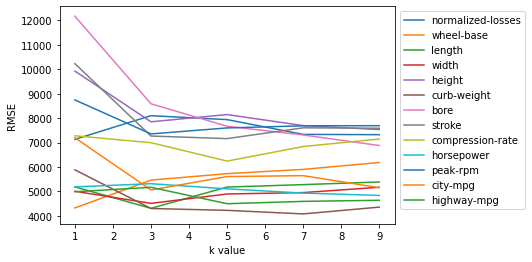

In [33]:
import matplotlib.pyplot as plt


lst = []


for k,v in k_rmse_values.items():
    x = list(v.keys())
    y = list(v.values())
    lst.append(k)
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')
    
plt.legend(lst, bbox_to_anchor = (1,1))    
plt.show()

## 4. Modèle multivarié

Pistes à suivre:
- Modifier la fonction knn_train_test() pour qu'elle accepte une liste de noms de colonne (au lieu d'un simple élément string). Modifier le reste de la logique de la fonction pour utiliser ce paramètre:
 + Au lieu d'utiliser une seule colonne pour entrainer et tester, utiliser toutes les colonnes transmises.
 + Utiliser la valeur k par défaut de scikit-learn pour le moment (nous ajusterons la valeur k à l'étape suivante).
- Utiliser les 2 meilleures caractéristiques de l'étape précédente pour entrainer et tester un modèle multivarié des k plus proches voisins en utilisant la valeur k par défaut.
- Utiliser les 3 meilleures caractéristiques de l'étape précédente pour entrainer et tester un modèle multivarié des k plus proches voisins en utilisant la valeur k par défaut.
- Utiliser les 4 meilleures caractéristiques de l'étape précédente pour entrainer et tester un modèle multivarié des k plus proches voisins en utilisant la valeur k par défaut.
- Utiliser les 5 meilleures caractéristiques de l'étape précédente pour entrainer et tester un modèle multivarié des k plus proches voisins en utilisant la valeur k par défaut.
- Utiliser les 6 meilleures caractéristiques de l'étape précédente pour entrainer et tester un modèle multivarié des k plus proches voisins en utilisant la valeur k par défaut.
- Afficher toutes les valeurs RMSE.

## 5. Variation des hyper paramètres

Pistes à suivre:
- Pour les 3 premiers modèles de la dernière étape, modifier la valeur de l'hyper paramètre de 1 à 25 et tracer les valeurs RMSE obtenues.
- Quelle valeur de k est optimal pour chaque modèle? Quelle différence y a-t-il entre les valeurs k et selon vous, qu'est ce qui explique ces différences?